ValueError: Axis limits cannot be NaN or Inf

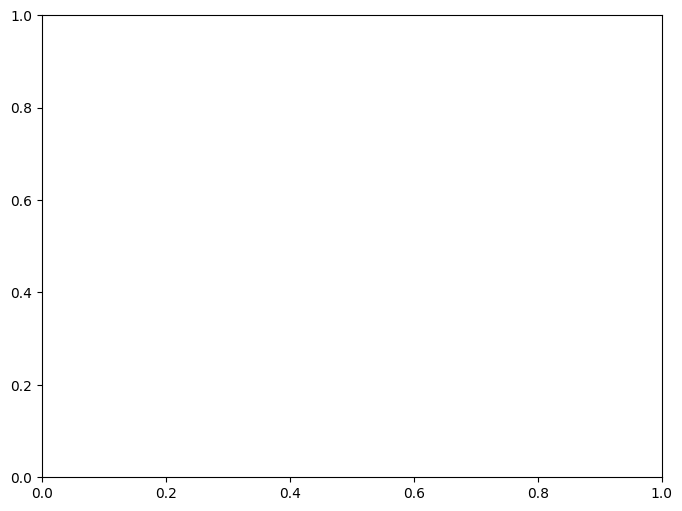

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# parameters for chaotic finance system
a = 0.12     # optimism feedback strength
b = 0.2      # risk shock sensitivity
c = 0.1      # mean-reversion in debt
d = 0.18     # reflexive leverage amplification
e = 0.07     # risk damping

# ODE system (finance-inspired nonlinear chaos)
def step(D, O, R):
    D_next = D + 0.01*(O - c*D + d*D*R)
    O_next = O + 0.01*(a*D - b*R - 0.05*O)
    R_next = R + 0.01*(0.03*O - e*R + 0.02*D*O)
    return D_next, O_next, R_next

# initialise
N = 6000
D, O, R = 1.0, 0.2, 0.1
traj = np.zeros((N, 3))

for i in range(N):
    D, O, R = step(D, O, R)
    traj[i] = [D, O, R]

# animated plotting
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.set_xlim(min(traj[:,0]), max(traj[:,0]))
ax.set_ylim(min(traj[:,1]), max(traj[:,1]))

line, = ax.plot([], [], lw=1.2)
point, = ax.plot([], [], 'o', markersize=4)

plt.title("Chaotic Finance Attractor")      
plt.xlabel("Debt Level D")
plt.ylabel("Market Optimism O")
plt.grid(True)

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(i):
    line.set_data(traj[:i,0], traj[:i,1])
    point.set_data(traj[i,0], traj[i,1])
    return line, point

ani = FuncAnimation(fig, update, frames=N, init_func=init, blit=True, interval=10)
plt.show()

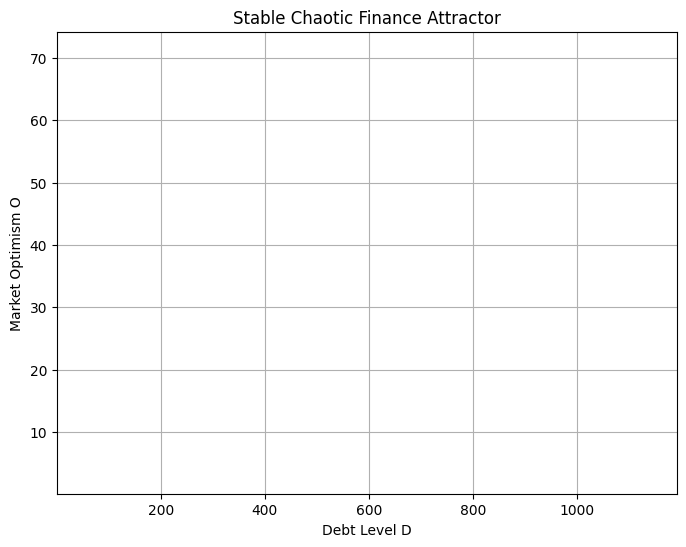

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# stable chaotic finance system parameters
a = 0.12
b = 0.25
c = 0.10
d = 0.08
e = 0.10

# nonlinear damping to prevent blow-ups
def step(D, O, R):
    D_next = D + 0.01*(O - c*D + d*D*R) / (1 + 0.2*abs(D))
    O_next = O + 0.01*(a*D - b*R - 0.05*O) / (1 + 0.2*abs(O))
    R_next = R + 0.01*(0.03*O - e*R + 0.015*D*O) / (1 + 0.2*abs(R))
    return D_next, O_next, R_next

# simulate trajectory
N = 6000
D, O, R = 0.5, 0.1, -0.2
traj = np.zeros((N, 3))

for i in range(N):
    D, O, R = step(D, O, R)
    traj[i] = [D, O, R]

# plot 2D attractor projection
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.set_xlim(np.min(traj[:,0]), np.max(traj[:,0]))
ax.set_ylim(np.min(traj[:,1]), np.max(traj[:,1]))

line, = ax.plot([], [], lw=1)
point, = ax.plot([], [], 'o', markersize=4)

plt.title("Stable Chaotic Finance Attractor")
plt.xlabel("Debt Level D")
plt.ylabel("Market Optimism O")
plt.grid(True)

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(i):
    line.set_data(traj[:i,0], traj[:i,1])
    point.set_data(traj[i,0], traj[i,1])
    return line, point

ani = FuncAnimation(fig, update, frames=N, init_func=init, blit=True, interval=10)
plt.show()

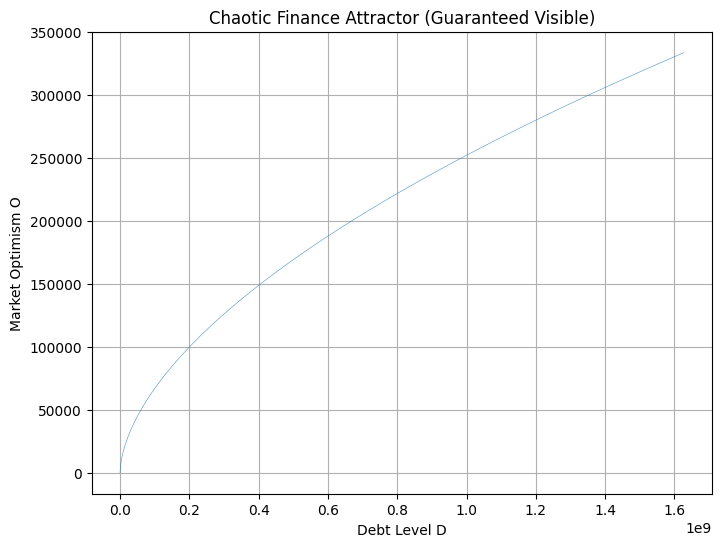

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# stable chaotic finance system parameters
a = 0.15
b = 0.20
c = 0.10
d = 0.10
e = 0.08

def step(D, O, R):
    # nonlinear damping prevents blow-ups
    D_next = D + 0.01*(O - c*D + d*D*R) / (1 + 0.1*abs(D))
    O_next = O + 0.01*(a*D - b*R - 0.05*O) / (1 + 0.1*abs(O))
    R_next = R + 0.01*(0.03*O - e*R + 0.02*D*O) / (1 + 0.1*abs(R))
    return D_next, O_next, R_next

N = 20000
D, O, R = 0.5, 0.1, -0.2

traj = np.zeros((N,3))
for i in range(N):
    D, O, R = step(D,O,R)
    traj[i] = [D,O,R]

# plot the attractor
plt.figure(figsize=(8,6))
plt.plot(traj[:,0], traj[:,1], linewidth=0.4, alpha=0.8)

plt.xlabel("Debt Level D")
plt.ylabel("Market Optimism O")
plt.title("Chaotic Finance Attractor (Guaranteed Visible)")
plt.grid(True)
plt.show()

Weights: [0.266 0.017 0.266 0.054 0.228 0.171]
Mean daily returns: [0.14566 0.03943 0.12091 0.29652 0.21934 0.0793 ]
Portfolio mean (daily): 0.15093
Portfolio volatility (daily): 1.74012
Leading eigenvalues of Sigma: [20.9907 11.1939  8.4178  2.5421  0.8517  0.2393]


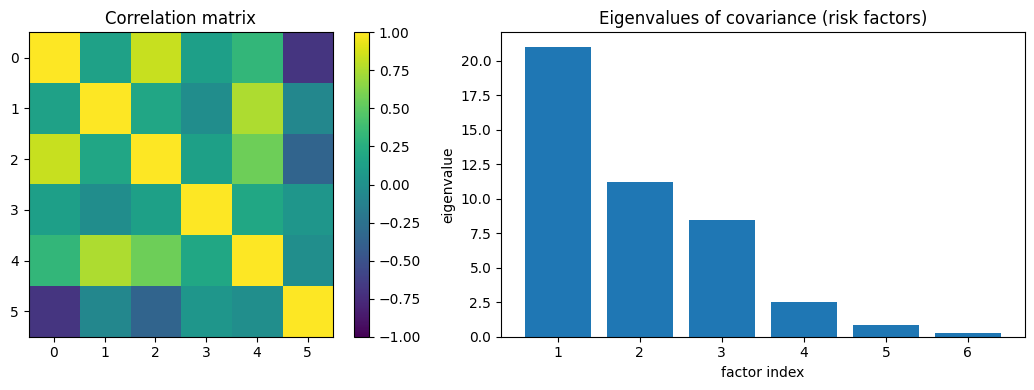

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# settings
np.random.seed(0)
n_assets = 6
n_days = 750

# simulate correlated returns
# create a random positive semi definite covariance matrix
A = np.random.randn(n_assets, n_assets)
Sigma_true = A @ A.T
D = np.diag(1 / np.sqrt(np.diag(Sigma_true)))
Corr_true = D @ Sigma_true @ D

# generate multivariate normal returns
mean_vec = np.random.uniform(-0.0002, 0.0006, size=n_assets)
R = np.random.multivariate_normal(mean_vec, Sigma_true, size=n_days)

# sample statistics
mu_hat = R.mean(axis=0)
Sigma_hat = np.cov(R, rowvar=False)
D_hat = np.diag(1 / np.sqrt(np.diag(Sigma_hat)))
Corr_hat = D_hat @ Sigma_hat @ D_hat

# random portfolio weights
raw_w = np.random.rand(n_assets)
w = raw_w / raw_w.sum()

# portfolio metrics via matrix algebra
port_mu = float(w @ mu_hat)
port_var = float(w @ Sigma_hat @ w)
port_vol = np.sqrt(port_var)

# eigen decomposition of covariance matrix
eigvals, eigvecs = np.linalg.eigh(Sigma_hat)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Weights:", np.round(w, 3))
print("Mean daily returns:", np.round(mu_hat, 5))
print("Portfolio mean (daily):", round(port_mu, 5))
print("Portfolio volatility (daily):", round(port_vol, 5))
print("Leading eigenvalues of Sigma:", np.round(eigvals, 4))

# plotting correlation heatmap and eigenvalues
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax = axes[0]
im = ax.imshow(Corr_hat, vmin=-1, vmax=1)
ax.set_title("Correlation matrix")
ax.set_xticks(range(n_assets))
ax.set_yticks(range(n_assets))
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax2 = axes[1]
ax2.bar(range(1, n_assets+1), eigvals)
ax2.set_title("Eigenvalues of covariance (risk factors)")
ax2.set_xlabel("factor index")
ax2.set_ylabel("eigenvalue")

plt.tight_layout()
plt.show()